In [148]:
import mediapipe as mp
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# **INFO KOORDINAT**

In [147]:
data = {
  'silhouette': [
    10,  338, 297, 332, 284, 251, 389, 356, 454, 323, 361, 288,
    397, 365, 379, 378, 400, 377, 152, 148, 176, 149, 150, 136,
    172, 58,  132, 93,  234, 127, 162, 21,  54,  103, 67,  109
  ],
  
  'lipsUpperOuter': [61, 185, 40, 39, 37, 0, 267, 269, 270, 409, 291],
  'lipsLowerOuter': [146, 91, 181, 84, 17, 314, 405, 321, 375, 291],
  'lipsUpperInner': [78, 191, 80, 81, 82, 13, 312, 311, 310, 415, 308],
  'lipsLowerInner': [78, 95, 88, 178, 87, 14, 317, 402, 318, 324, 308],
  
  'rightEyeUpper0': [246, 161, 160, 159, 158, 157, 173],
  'rightEyeLower0': [33, 7, 163, 144, 145, 153, 154, 155, 133],
  
  'rightEyeUpper1': [247, 30, 29, 27, 28, 56, 190],
  'rightEyeLower1': [130, 25, 110, 24, 23, 22, 26, 112, 243],
  
  'rightEyeUpper2': [113, 225, 224, 223, 222, 221, 189],
  'rightEyeLower2': [226, 31, 228, 229, 230, 231, 232, 233, 244],
  
  'rightEyeLower3': [143, 111, 117, 118, 119, 120, 121, 128, 245],
  'rightEyebrowUpper': [156, 70, 63, 105, 66, 107, 55, 193],
  
  'rightEyebrowLower': [35, 124, 46, 53, 52, 65],
  'rightEyeIris': [473, 474, 475, 476, 477],
  
  'leftEyeUpper0': [466, 388, 387, 386, 385, 384, 398],
  'leftEyeLower0': [263, 249, 390, 373, 374, 380, 381, 382, 362],
  
  'leftEyeUpper1': [467, 260, 259, 257, 258, 286, 414],
  'leftEyeLower1': [359, 255, 339, 254, 253, 252, 256, 341, 463],
  
  'leftEyeUpper2': [342, 445, 444, 443, 442, 441, 413],
  'leftEyeLower2': [446, 261, 448, 449, 450, 451, 452, 453, 464],
  
  'leftEyeLower3': [372, 340, 346, 347, 348, 349, 350, 357, 465],
  'leftEyebrowUpper': [383, 300, 293, 334, 296, 336, 285, 417],
  
  'leftEyebrowLower': [265, 353, 276, 283, 282, 295],
  'leftEyeIris': [468, 469, 470, 471, 472],
  
  'midwayBetweenEyes': [168],
  
  'noseTip': [1],
  'noseBottom': [2],
  'noseRightCorner': [98],
  'noseLeftCorner': [327],
  
  'rightCheek': [205],
  'leftCheek': [425]
}


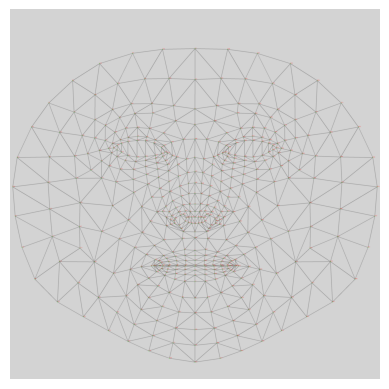

In [153]:
plt.imshow(cv2.cvtColor(cv2.imread("skeleton-landmark.png"), cv2.COLOR_BGR2RGB))
plt.axis('off')  # Opsional: Menghilangkan sumbu koordinat
plt.show()


#### **LINK LANDMARKS INDEKS**
- https://raw.githubusercontent.com/rcsmit/python_scripts_rcsmit/master/extras/Gal_Gadot_by_Gage_Skidmore_4_5000x5921_annotated_white_letters.jpg
- https://raw.githubusercontent.com/google/mediapipe/a908d668c730da128dfa8d9f6bd25d519d006692/mediapipe/modules/face_geometry/data/canonical_face_model_uv_visualization.png
- https://github.com/tensorflow/tfjs-models/blob/838611c02f51159afdd77469ce67f0e26b7bbb23/face-landmarks-detection/src/mediapipe-facemesh/keypoints.ts

# **CARI KOORDINAT YANG INGIN DIPAKAI**

In [ ]:
cap = cv2.VideoCapture(0)

facmesh = mp.solutions.face_mesh
face = facmesh.FaceMesh(static_image_mode=True, min_tracking_confidence=0.6, min_detection_confidence=0.6)
draw = mp.solutions.drawing_utils
while True:
    _, frm = cap.read()
    rgb = cv2.cvtColor(frm, cv2.COLOR_BGR2RGB)
    op = face.process(rgb)
    
    if op.multi_face_landmarks:
        for face_landmarks in op.multi_face_landmarks:
            filtered_landmarks = [face_landmarks.landmark[idx] for idx in [13, 14, 385, 374, 159, 145, 152]]
            
            for landmark in filtered_landmarks:
                x = int(landmark.x * frm.shape[1])
                y = int(landmark.y * frm.shape[0])
                cv2.circle(frm, (x, y), 1, (0, 255, 255), -1)
    
    cv2.imshow("window", frm)
    
    if cv2.waitKey(1) == 27:
        cap.release()
        cv2.destroyAllWindows()
        break
